### Exploratory Data Analysis – Student Academic Behavior & Performance

****

**Objective: To explore behavioral, psychological, and lifestyle factors that influence GPA and exam performance**



# 📌 1. Import Library & Konfigurasi Awal

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: untuk visualisasi missing values
import missingno as msno

# Konfigurasi visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📦 2. Load Dataset

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Project/Personal Project/2025/2. Dummy Project/1. Student Performance/cleaned_data.csv')

In [28]:
# Preview
df.head()

,student_id,age,gender,major,study_hours_per_day_average,social_media_hours_average,netflix_hours_average,part_time_job,attendance_percentage,sleep_hours_average,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,male,Computer Science,7.645367,0.428571,0.014286,1,70.30%,6.2,...,10.9,Co-Learning Group,1,2,9,7,3,Reading,3.0,100
1,100001,28,male,Arts,5.700000,0.071429,0.057143,0,88.40%,7.2,...,8.3,Co-Learning Group,1,0,7,2,5,Reading,6.0,99
2,100002,17,male,Arts,2.400000,0.600000,0.100000,0,82.10%,9.2,...,8.0,Library,1,2,3,9,1,Kinesthetic,7.6,98
3,100003,27,other,Psychology,3.400000,0.657143,0.328571,1,79.30%,4.2,...,11.7,Co-Learning Group,1,0,5,3,5,Reading,3.2,100
4,100004,25,female,Business,4.700000,0.114286,0.385714,1,62.90%,6.5,...,9.4,Quiet Room,1,1,9,1,5,Reading,7.1,98


# 🔍 3. Data Overview
In this section we will look at the general structure of the dataset: number of rows & columns, data types, empty values, and duplicate data.

In [29]:
# Dimensi dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (80000, 31)


In [30]:
# Info tipe data dan null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day_average    80000 non-null  float64
 5   social_media_hours_average     80000 non-null  float64
 6   netflix_hours_average          80000 non-null  float64
 7   part_time_job                  80000 non-null  int64  
 8   attendance_percentage          80000 non-null  object 
 9   sleep_hours_average            80000 non-null  float64
 10  diet_quality                   80000 non-null  int64  
 11  exercise_frequency_weekly      80000 non-null  float64
 12  parental_education_level       80000 non-null 

In [31]:
# Statistik deskriptif
df.describe()

,student_id,age,study_hours_per_day_average,social_media_hours_average,netflix_hours_average,part_time_job,sleep_hours_average,diet_quality,exercise_frequency_weekly,internet_quality,...,dropout_risk,social_activity,screen_time,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,0.357338,0.285393,0.497563,7.017417,1.332288,0.502370,1.334800,...,0.019775,2.500225,9.673029,0.499513,0.999162,5.479438,5.488525,3.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,0.206492,0.165142,0.499997,1.467377,0.745439,0.327368,1.248721,...,0.139227,1.704292,2.780869,0.500003,0.816805,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,0.171429,0.142857,0.000000,6.000000,1.000000,0.285714,0.000000,...,0.000000,1.000000,7.800000,0.000000,0.000000,3.000000,3.000000,2.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,0.357143,0.285714,0.000000,7.000000,1.000000,0.571429,1.000000,...,0.000000,2.000000,9.700000,0.000000,1.000000,5.000000,5.000000,5.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,0.542857,0.428571,1.000000,8.000000,2.000000,0.857143,3.000000,...,0.000000,4.000000,11.600000,1.000000,2.000000,8.000000,8.000000,5.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,0.714286,0.571429,1.000000,12.000000,2.000000,1.000000,3.000000,...,1.000000,5.000000,21.000000,1.000000,2.000000,10.000000,10.000000,5.000000,10.000000,100.000000


In [32]:
# Statistik deskriptif (Untuk tipe data non-numeric)
df.describe(include='object')

,gender,major,attendance_percentage,parental_education_level,study_environment,learning_style
count,80000,80000,80000,80000,80000,80000
unique,3,6,601,5,5,4
top,female,Arts,40.90%,Some College,Dorm,Kinesthetic
freq,26705,13505,171,16115,16119,20143


In [33]:
# Cek duplikasi
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


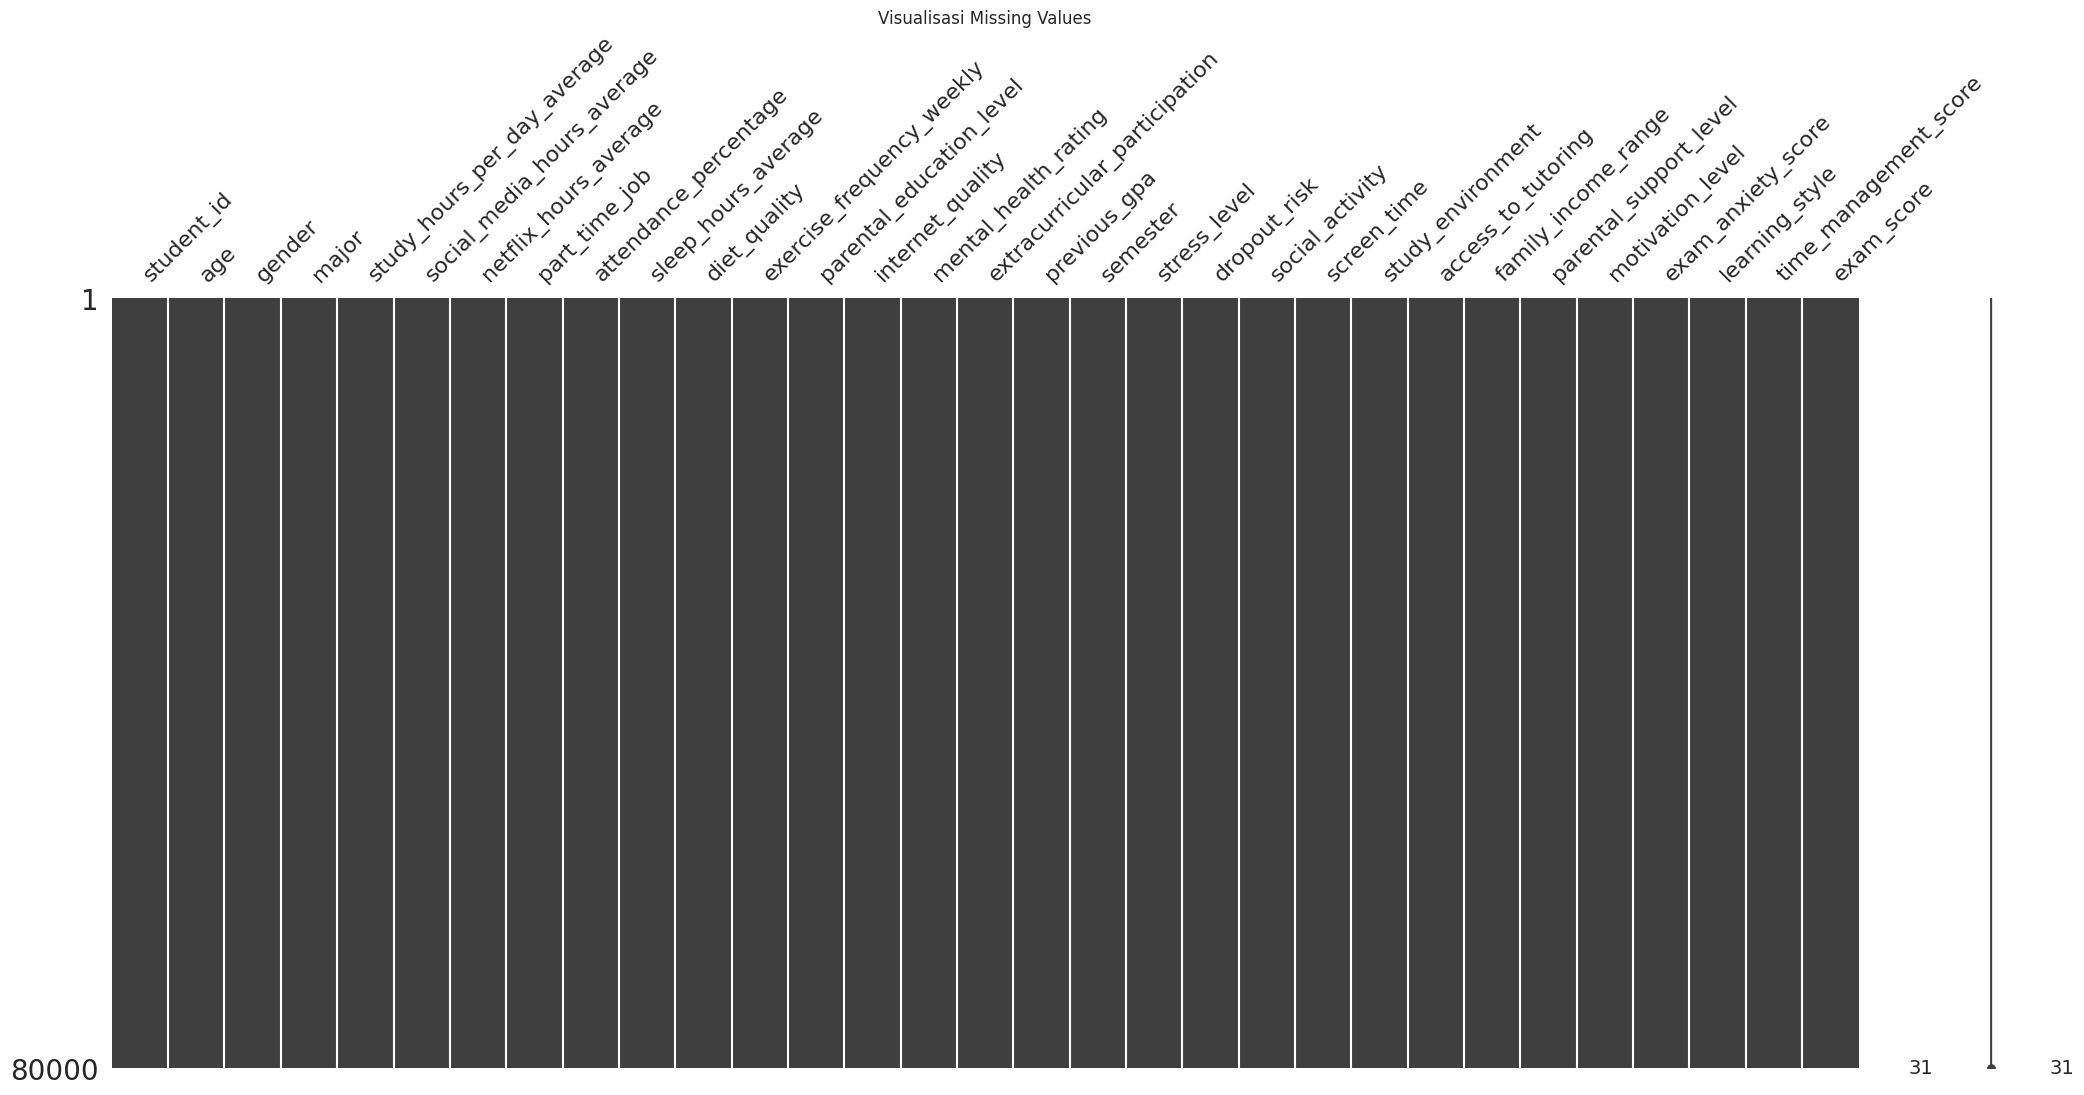

In [34]:
# Visualisasi missing values (jika ada)
msno.matrix(df)
plt.title("Visualisasi Missing Values")
plt.show()

# 📊 4. Univariate Analysis
Analyze the distribution of each numerical feature to see the spread of values, gross outliers, and the scale of the data.

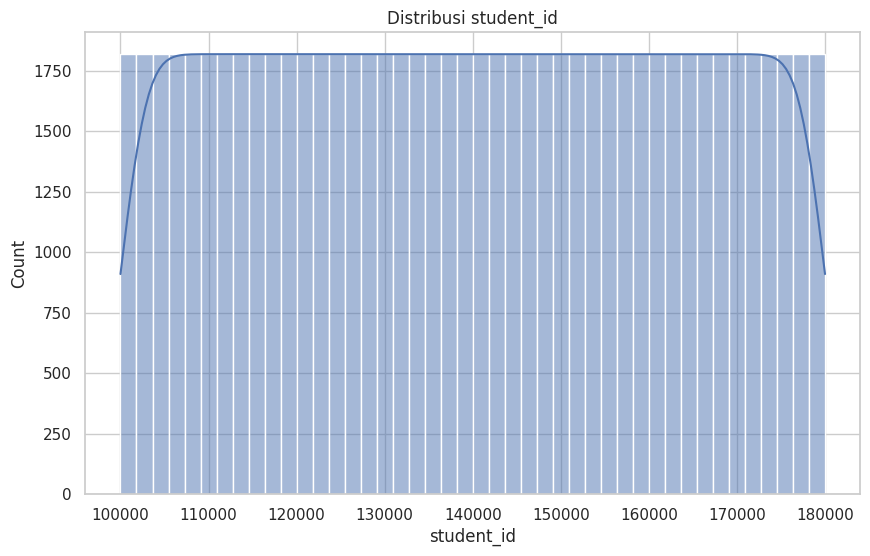

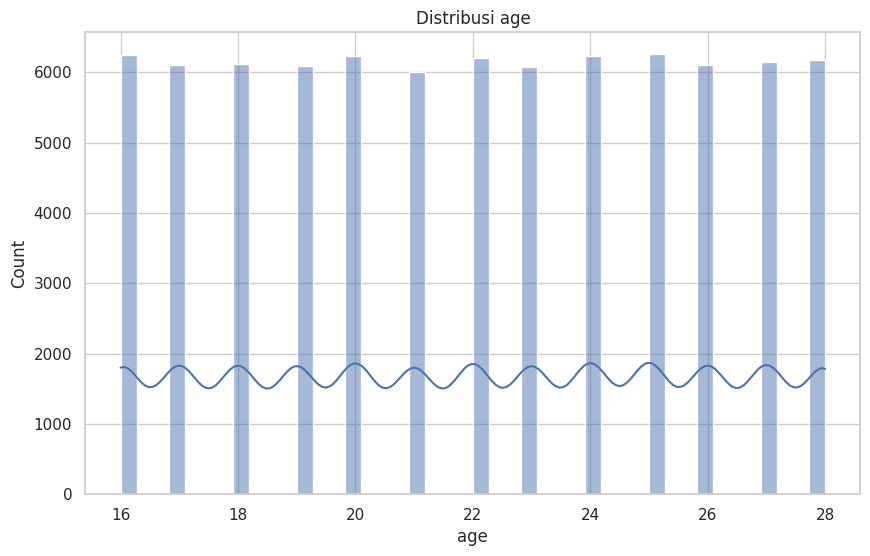

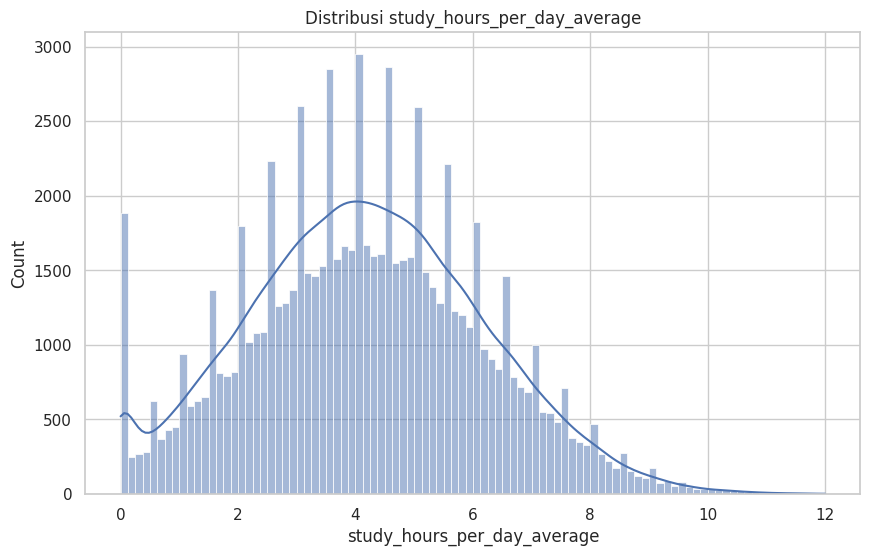

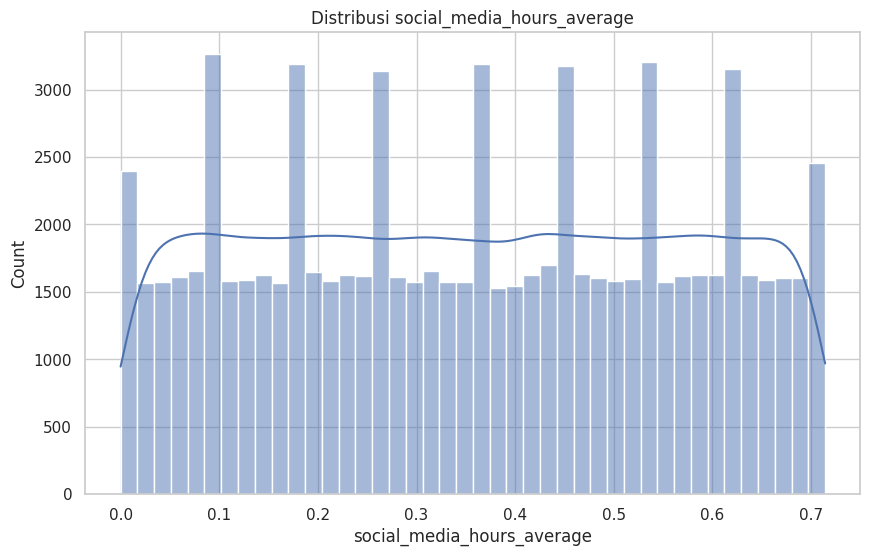

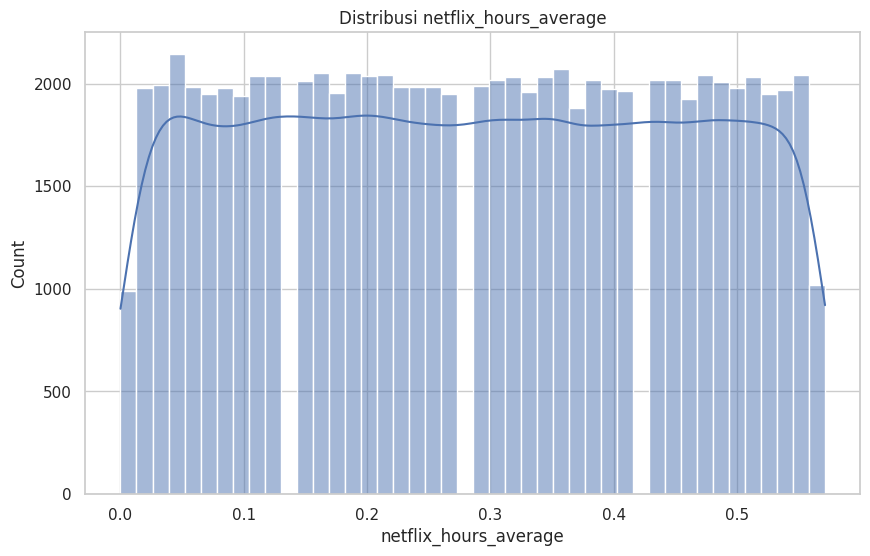

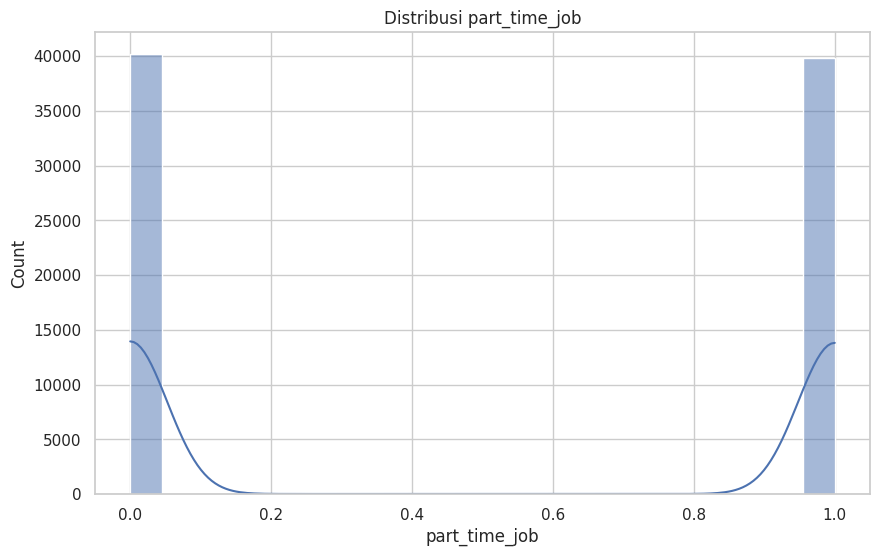

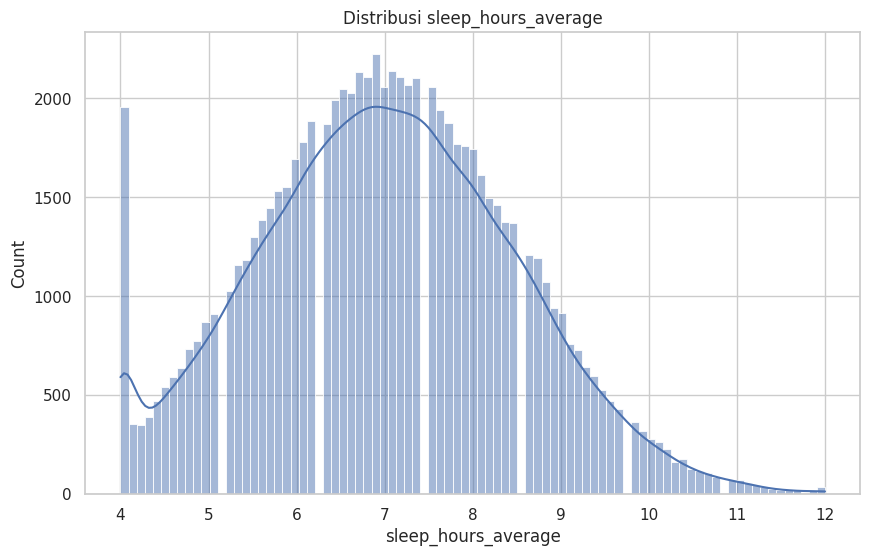

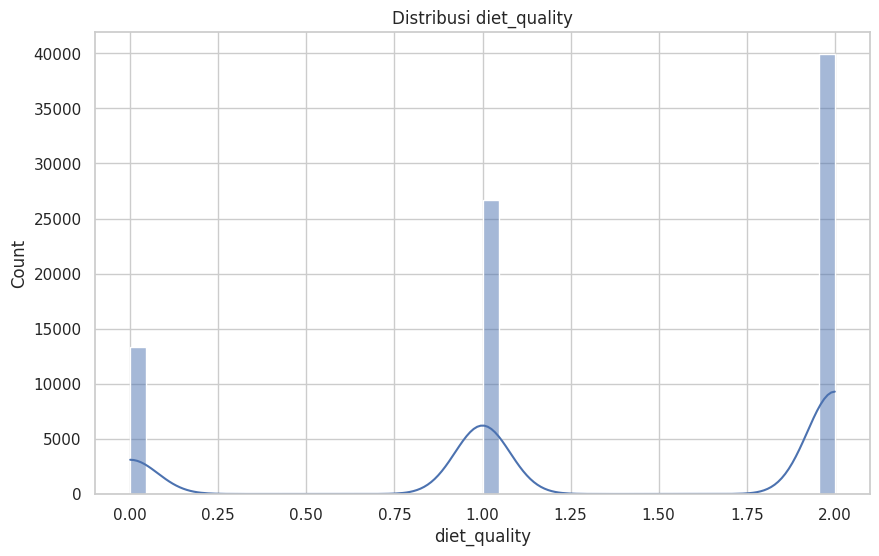

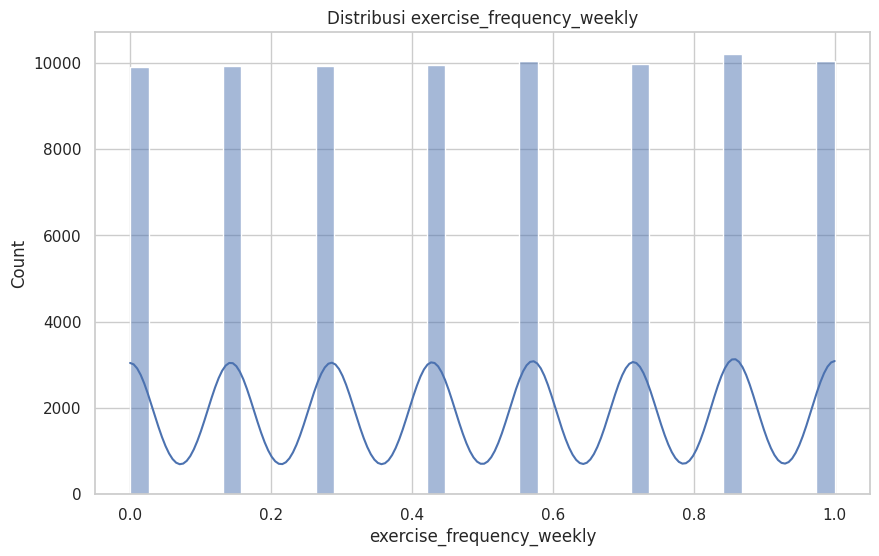

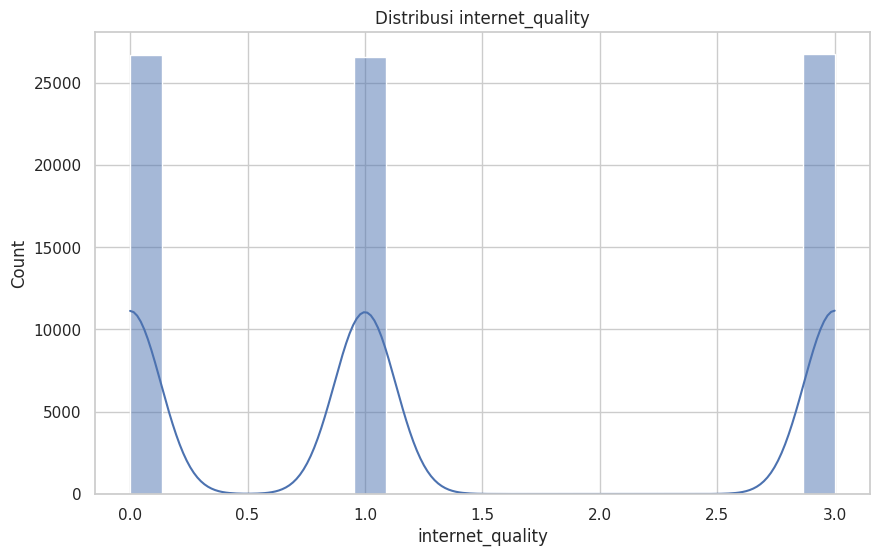

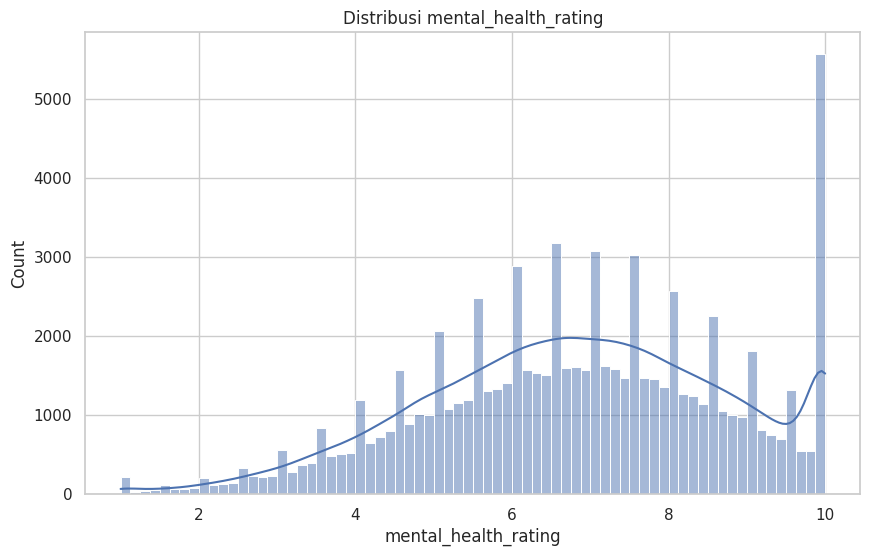

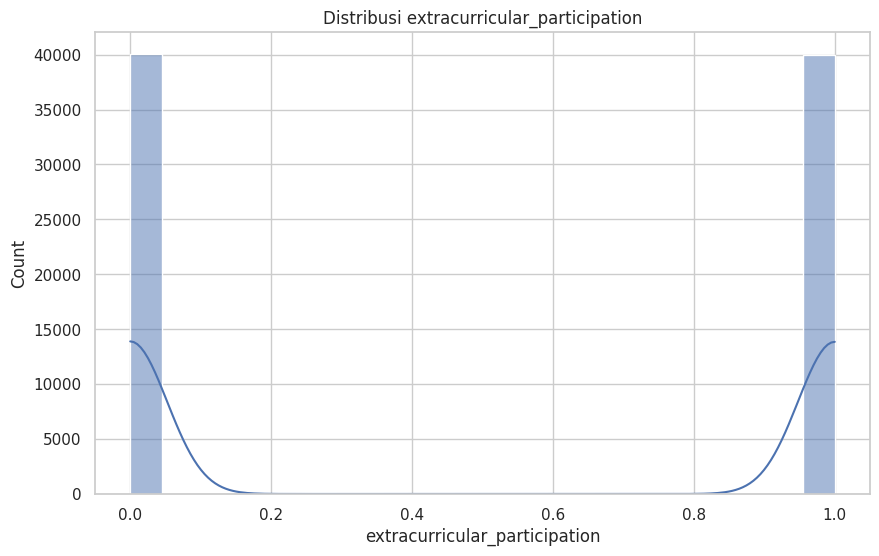

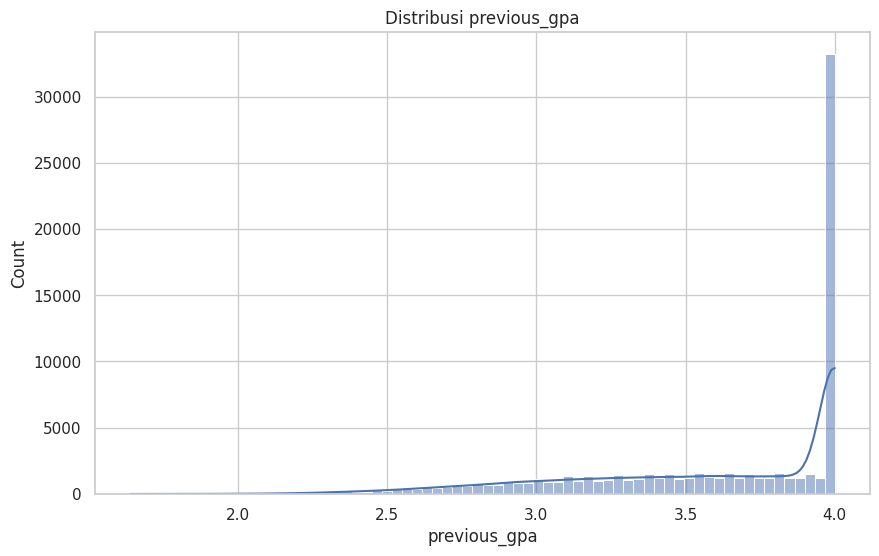

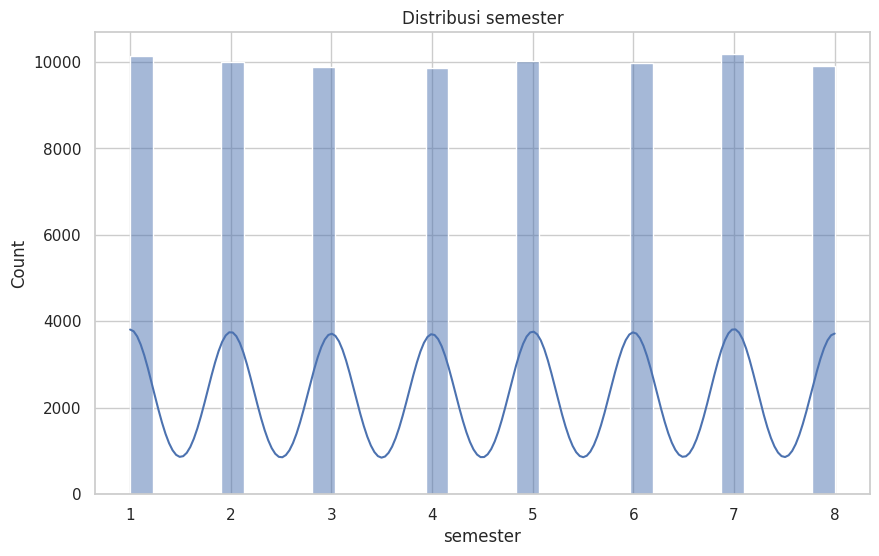

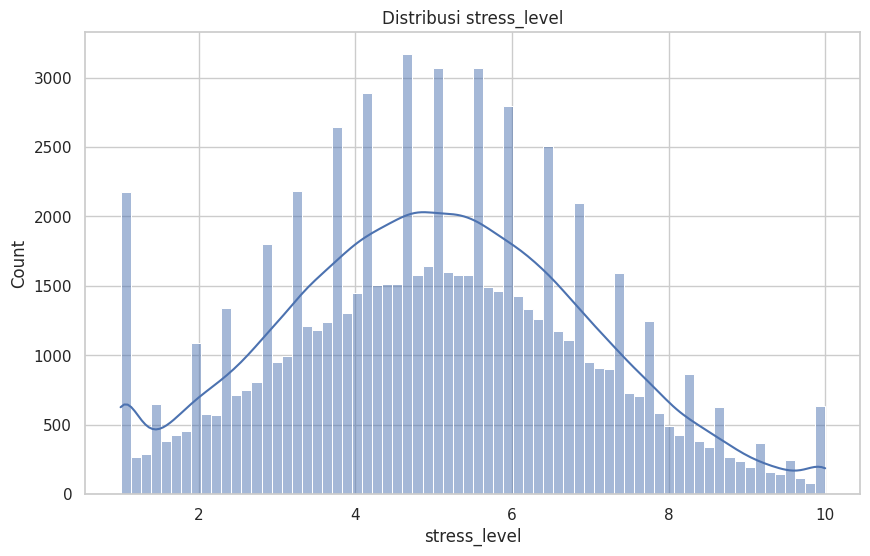

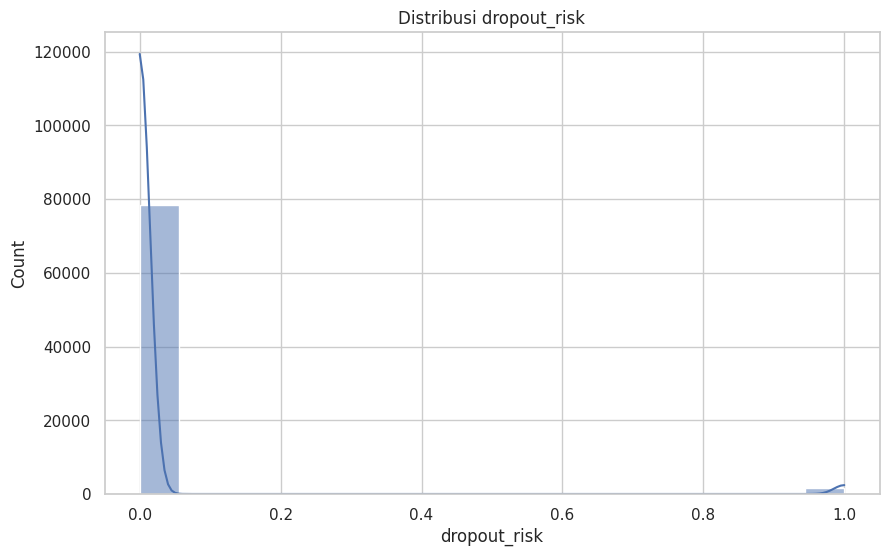

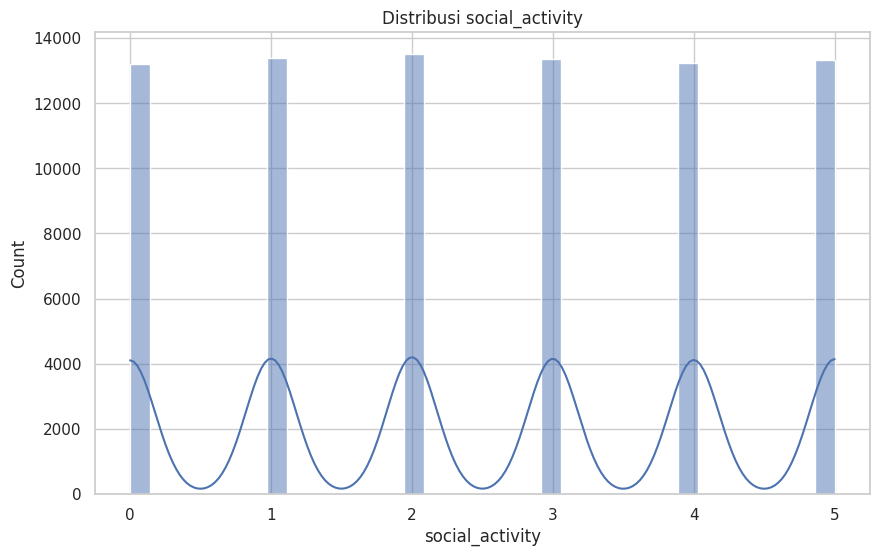

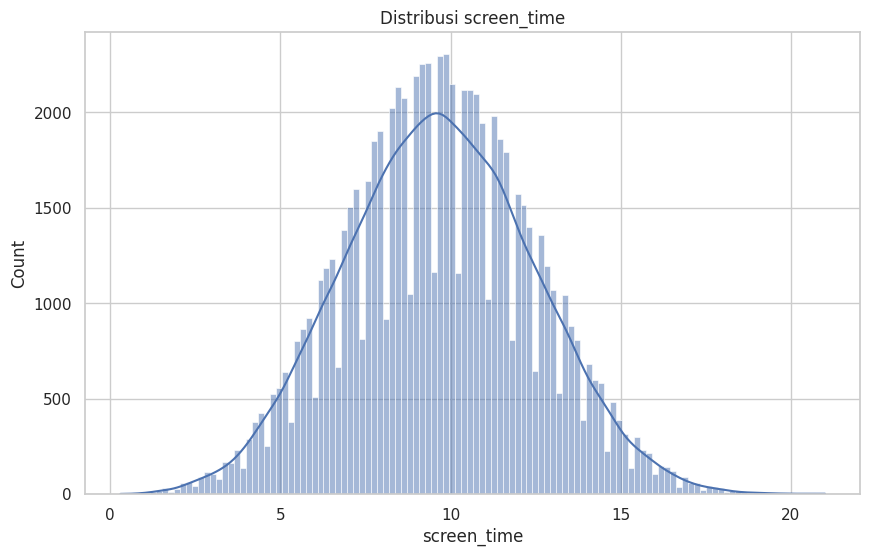

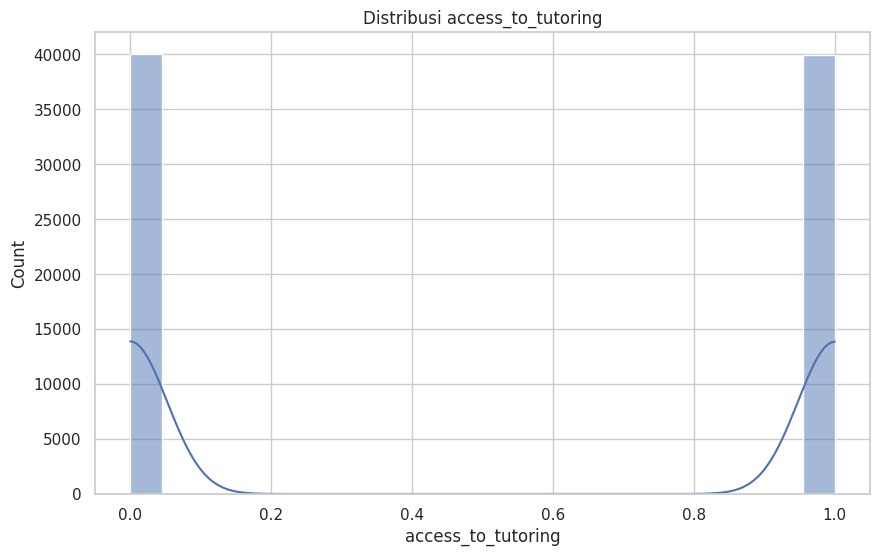

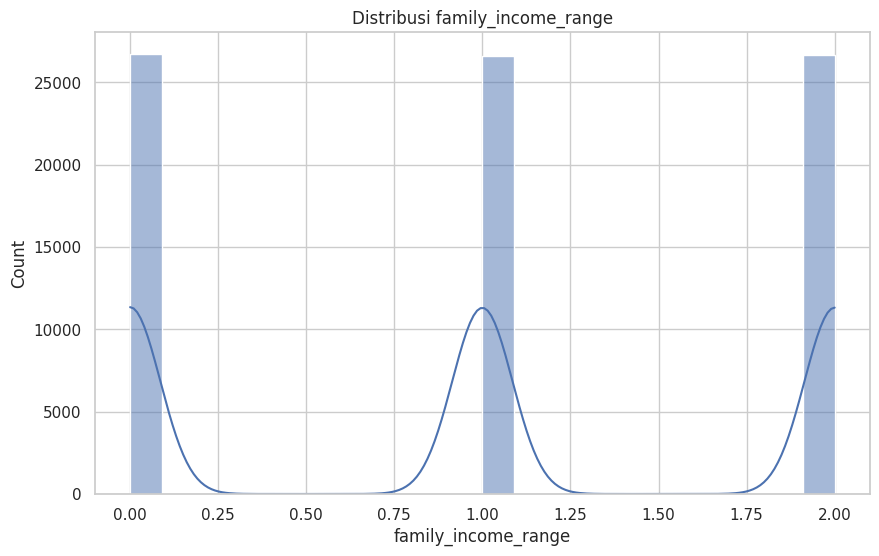

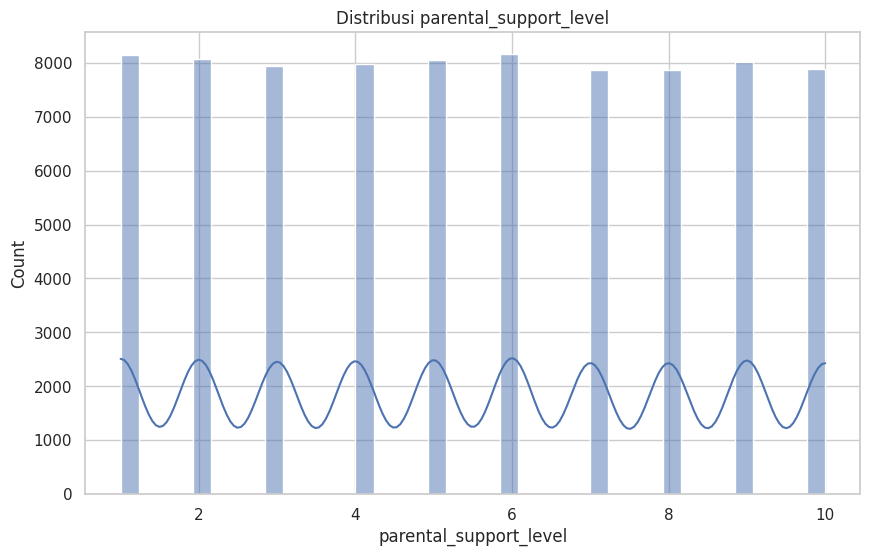

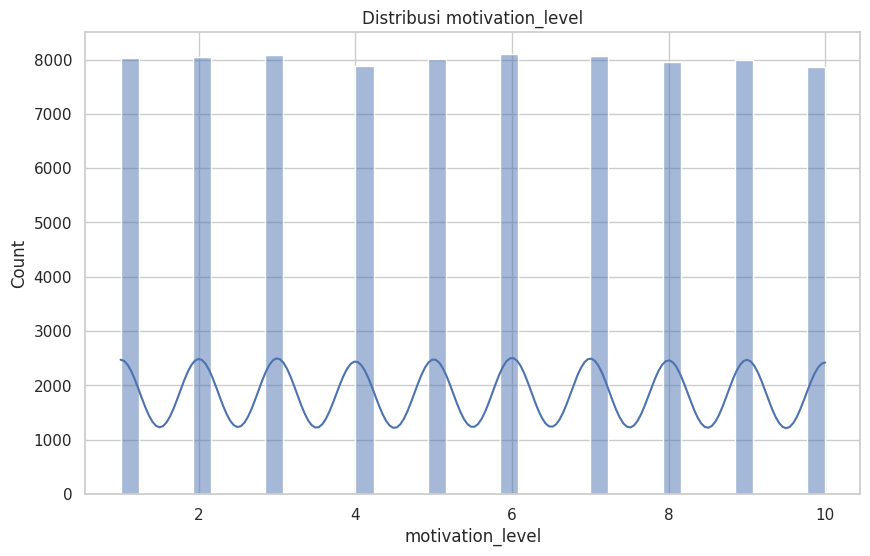

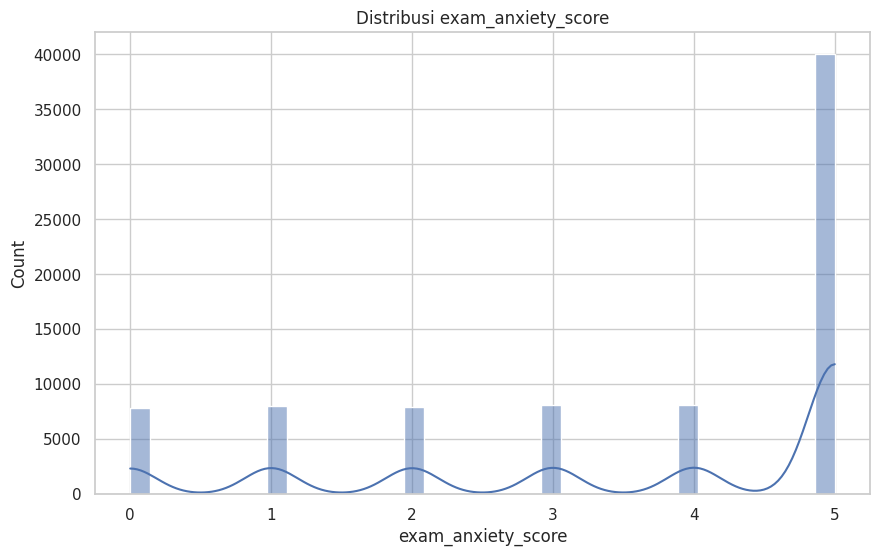

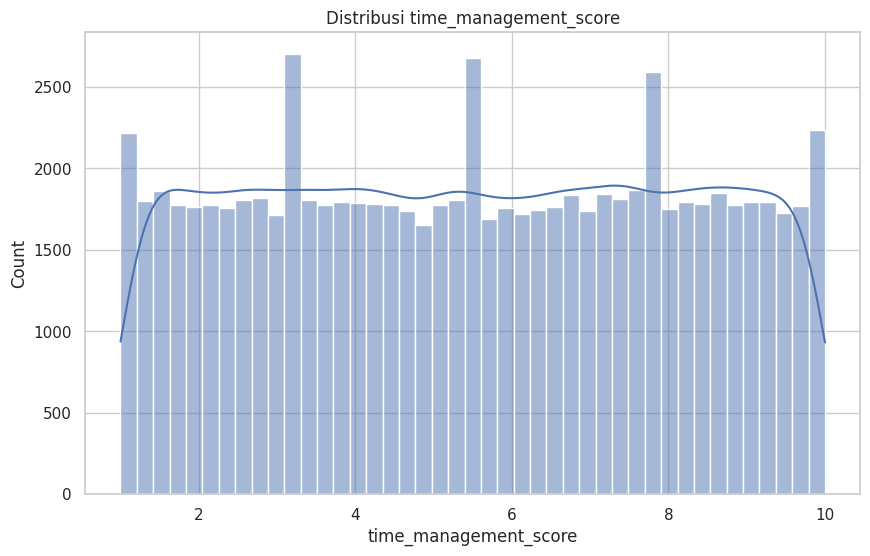

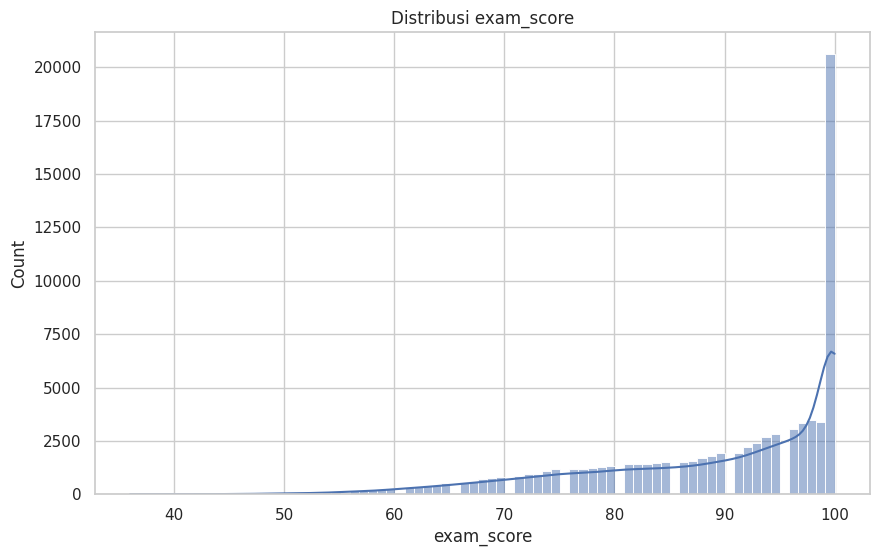

In [35]:
# Histogram + KDE untuk numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# 📋 5. Countplot untuk Kategorikal

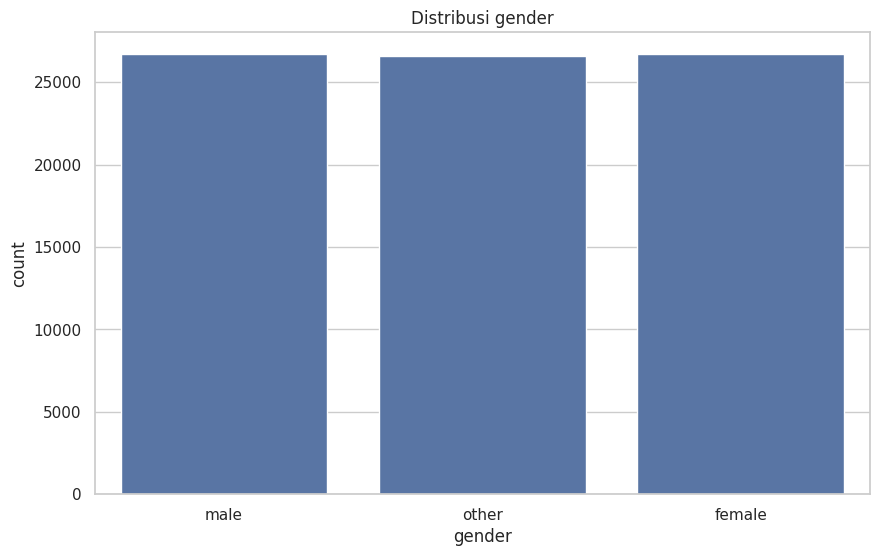

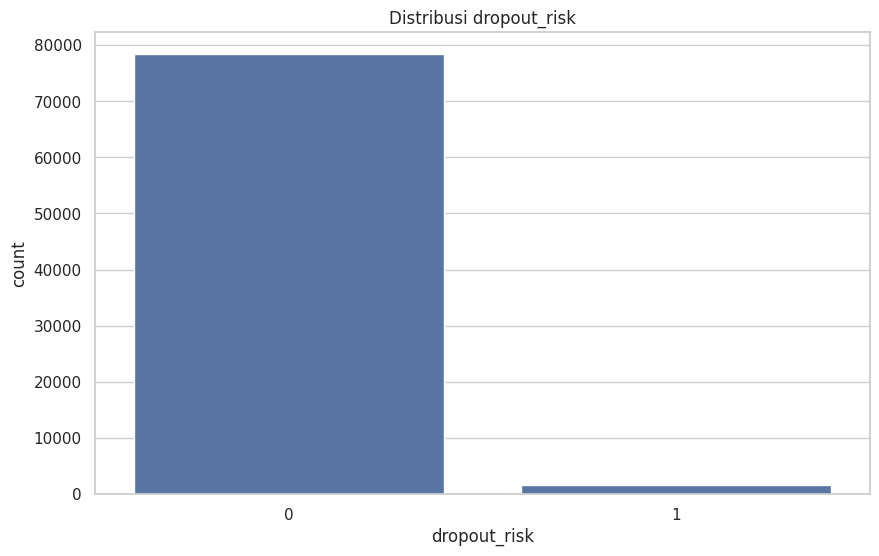

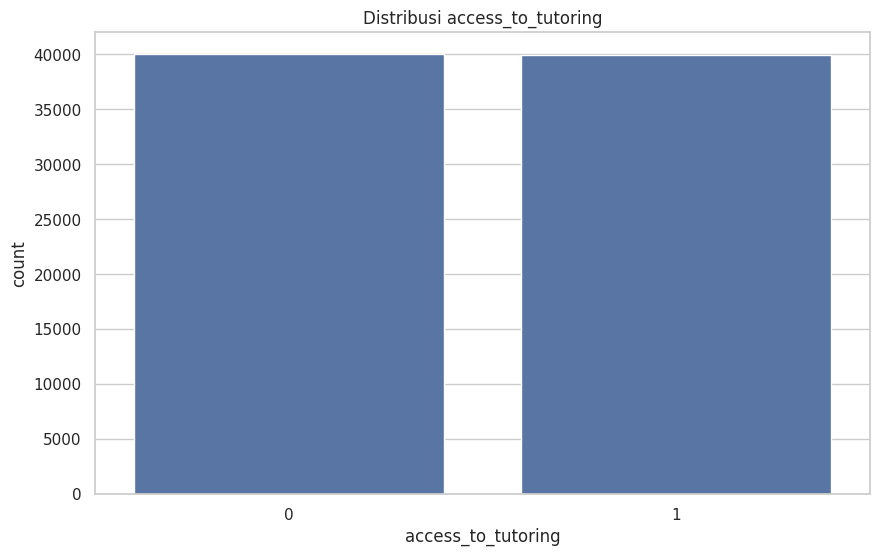

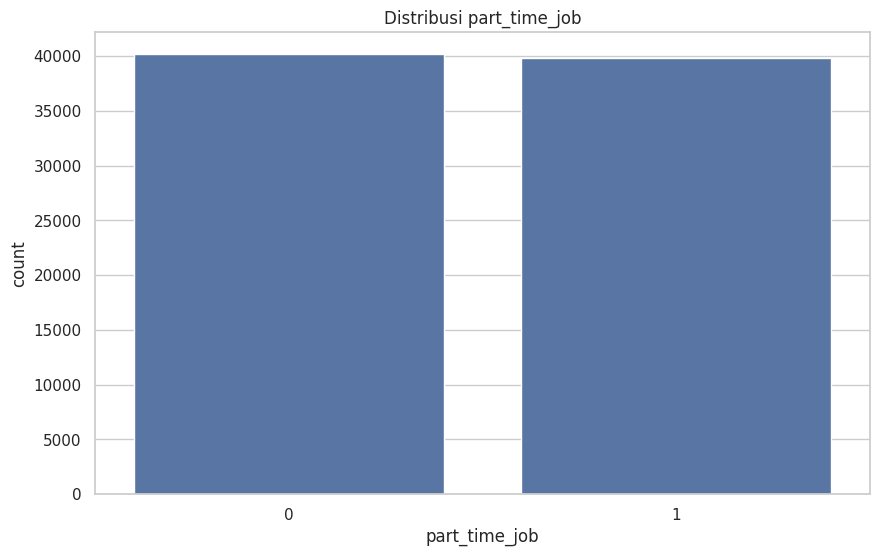

In [36]:
categorical_cols = ['gender', 'dropout_risk', 'access_to_tutoring', 'part_time_job']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()

# 🔗 6. Korelasi & Scatterplot

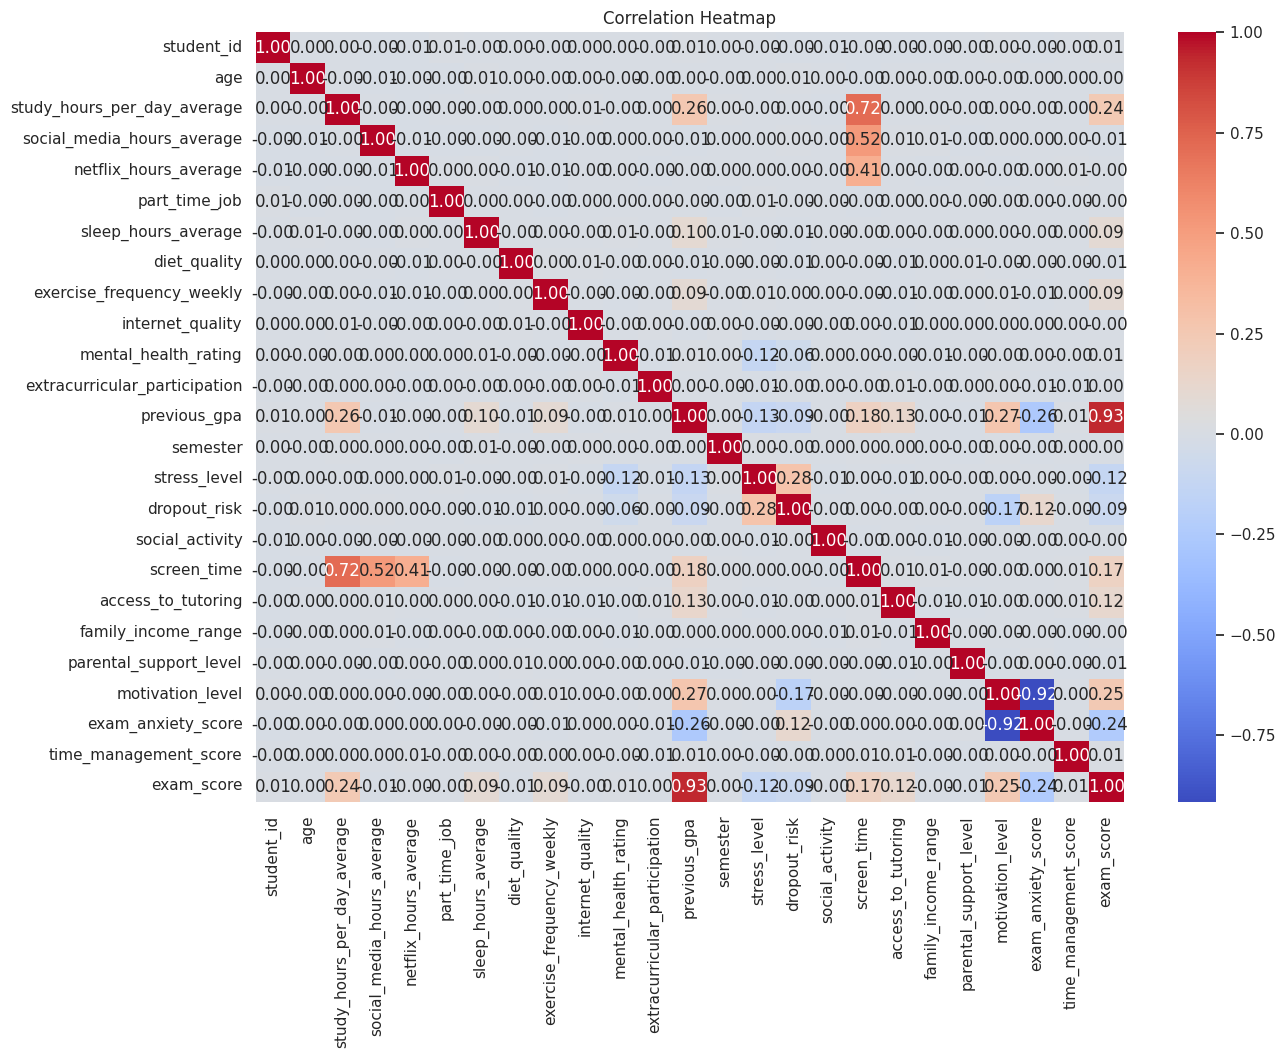

In [37]:
# Heatmap korelasi numerik
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

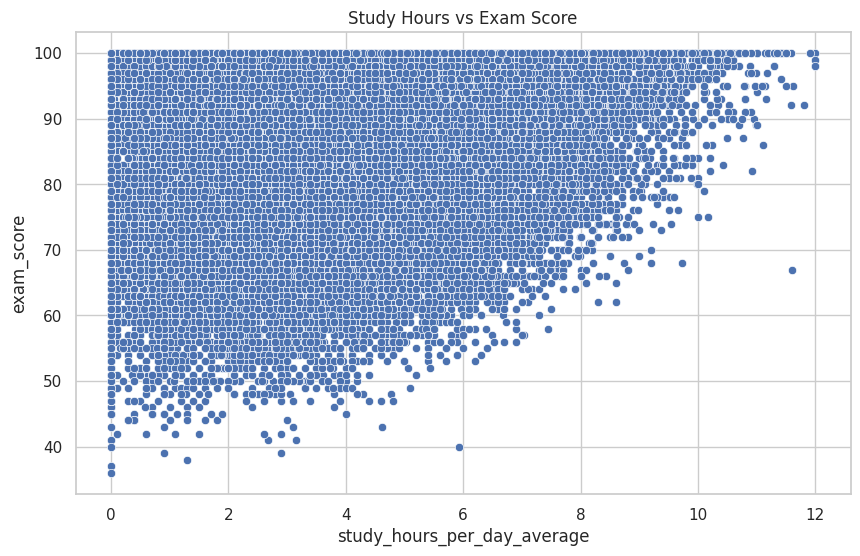

In [39]:
# Contoh scatterplot hubungan dua variabel
sns.scatterplot(x='study_hours_per_day_average', y='exam_score', data=df)
plt.title("Study Hours vs Exam Score")
plt.show()

# 📦 7. Boxplot Kategori vs Target

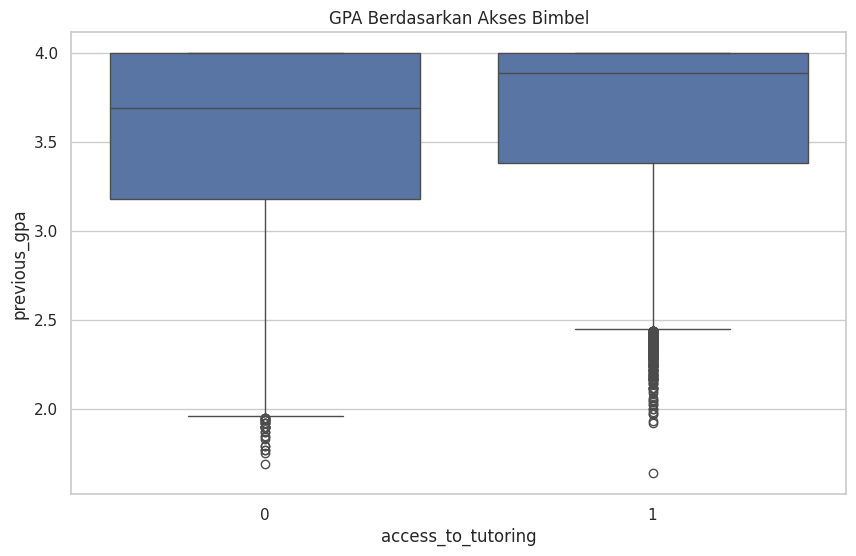

In [42]:
# Boxplot pengaruh akses bimbel terhadap GPA
sns.boxplot(x='access_to_tutoring', y='previous_gpa', data=df)
plt.title("GPA Berdasarkan Akses Bimbel")
plt.show()

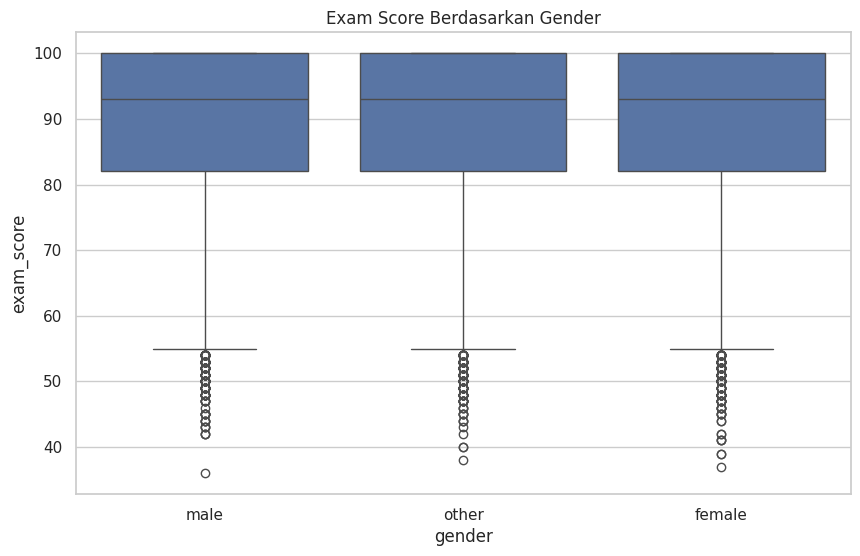

In [43]:
# Boxplot gender vs exam_score
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title("Exam Score Berdasarkan Gender")
plt.show()

# 🚨 8. Deteksi Outlier (IQR Method)

In [45]:
def detect_outliers_all_numeric(data):
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
    summary = []

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]

        summary.append({
            'Kolom': col,
            'Jumlah Outlier': outlier_count,
            'Range Normal': f'{round(lower_bound,2)} – {round(upper_bound,2)}'
        })

    return pd.DataFrame(summary)

In [46]:
outlier_summary = detect_outliers_all_numeric(df)
display(outlier_summary)

,Kolom,Jumlah Outlier,Range Normal
0,student_id,0,60000.5 – 219998.5
1,age,0,10.0 – 34.0
2,study_hours_per_day_average,346,-1.25 – 9.55
3,social_media_hours_average,0,-0.39 – 1.1
4,netflix_hours_average,0,-0.29 – 0.86
5,part_time_job,0,-1.5 – 2.5
6,sleep_hours_average,284,3.0 – 11.0
7,diet_quality,0,-0.5 – 3.5
8,exercise_frequency_weekly,0,-0.57 – 1.71
9,internet_quality,0,-4.5 – 7.5


# 📝 9. Insight Ringkasan (Markdown Cell)

## ✨ Key Insights from EDA

- Students who study more than 4 hours/day tend to score higher in exams and GPA.
- High exam anxiety is negatively correlated with exam performance.
- Students with part-time jobs show slightly lower average attendance and GPA.
- Access to tutoring appears positively correlated with both GPA and exam scores.
- Gender differences in exam score are minimal, but further breakdown by other variables may reveal more.
- The distribution of `study_hours_per_day` shows the majority of students study between 2-5 hours per day.
- Exam score has a positive correlation with study_hours and access_to_tutoring.
- The boxplot shows that students who have access to tutoring tend to have a higher GPA.